Iteration:  0
[8 3 2 ... 1 2 5] [3 4 5 ... 5 1 5]
0.12326829268292683
Iteration:  100
[3 4 8 ... 5 1 5] [3 4 5 ... 5 1 5]
0.8154390243902438
Iteration:  200
[3 4 8 ... 5 1 5] [3 4 5 ... 5 1 5]
0.8767317073170732
Iteration:  300
[3 4 8 ... 5 1 5] [3 4 5 ... 5 1 5]
0.8914146341463415
Iteration:  400
[3 4 8 ... 5 1 5] [3 4 5 ... 5 1 5]
0.8977317073170732
Iteration:  500
[3 4 8 ... 5 1 5] [3 4 5 ... 5 1 5]
0.9060243902439025
Iteration:  600
[3 4 4 ... 5 1 5] [3 4 5 ... 5 1 5]
0.8932439024390244
Iteration:  700
[3 4 8 ... 5 1 5] [3 4 5 ... 5 1 5]
0.9131951219512195
Iteration:  800
[3 4 8 ... 5 1 5] [3 4 5 ... 5 1 5]
0.9155365853658537
Iteration:  900
[3 4 8 ... 5 1 5] [3 4 5 ... 5 1 5]
0.9171951219512195
Prediction: [6]
Label: 6


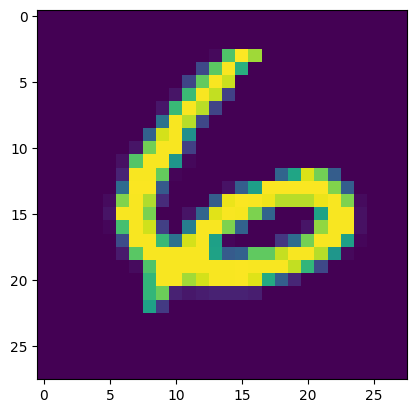

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

dataset = pd.read_csv("C:/Users/HP/Desktop/Data sets/train.csv")

dataset = np.array(dataset)
m,n = dataset.shape    # (42000,785)
np.random.shuffle(dataset)

data_dev = dataset[0:1000].T
Y_dev = data_dev[0]     # (1000,)
X_dev = data_dev[1:n]   # (784, 1000)
X_dev = X_dev/255

data_train = dataset[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_,m_train = X_train.shape

def init_params():
    W1 = np.random.rand(10, 784)-0.5
    b1 = np.random.rand(10, 1)-0.5
    W2 = np.random.rand(10, 10)-0.5
    b2 = np.random.rand(10, 1)-0.5
    return W1, b1,W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z)/sum(np.exp(Z))
    return A

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X)+b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_derive(Z):
    return Z>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2-one_hot_Y
    dW2 = 1/m*dZ2.dot(A1.T)
    db2 = 1/m*np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2)*ReLU_derive(Z1)
    dW1 = 1/m*dZ1.dot(X.T)
    db1 = 1/m* np.sum(dZ1)
    return dW1,db1, dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1,b1, W2, b2    

def get_prediction(A2):
    return np.argmax(A2, 0)

def get_accuracy(prediction, Y):
    print(prediction,Y)
    return np.sum(prediction == Y)/Y.size

def gradient_descent(X,Y,alpha, iterations):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1, W2, b2,X)
        dW1, db1,dW2,db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i % 100 == 0:
            print('Iteration: ',i)
            prediction = get_prediction(A2)
            print(get_accuracy(prediction, Y))
    return W1,b1,W2,b2        

W1,b1,W2,b2 = gradient_descent(X_train, Y_train, 0.9, 1000)

def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_prediction(A2)
    return predictions

def test_prediction(index, W1,b1,W2,b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1,b1,W2,b2)
    label = Y_train[index]
    print('Prediction:', prediction)
    print('Label:', label)

    current_image = current_image.reshape((28,28))
    
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()
    

test_prediction(8,W1,b1,W2,b2)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1.